# FIFA Overall Player Ratings Prediction Using Regression Methods

Awwal Mohammed <br>
International University of Malaya-Wales &copy; 2020-2022

## Introduction


This report covers basic approaches to using <b>easily-understood machine learning techniques</b> to predict "overall player ratings"[<sup id="fn1-back">1</sup>](#fn1 "see footnote on clarification of overall ratings in FIFA") based on data obtained from the FIFA video games, with initial inference from real life football data. 

<b>KNN Regression, Multiple Linear Regression, Voting Regressor, and Gradient Boosting Regressor</b> algorithmic models are used in this research. Evaluation methods such as <b>Lasso, Ridge, Cross-Validation, and Multiple KNN value comparison</b> are explored.

FIFA ratings are an aggregate weighted metric which serves as a player’s overall beneficiary. It lies within the range of 0-99 with the provision that the higher the number, the better. For example, Cristiano Ronaldo may be rated 93 while Lionel Messi may be rated 94.

This report aims to tackle the following:
    <ol>
    <li>Predicting FIFA overall ratings of outfield players[<sup id="fn2-back">2</sup>](#fn2) from <i>FIFA 20</i>, and crosschecking it against existing results.</li>
    <li>Identifying the feature(s) that influence(s) the ratings the most.</li>
    </ol>

This is a <b>supervised learning</b> exercise. The report culminates with a summary of the performance of each algorithm in predicting the overall ratings.

<hr>

[<sup id="fn1">1</sup>](#fn1-back) The FIFA video games consist of several ratings for each player. The aggregate of a given set of ratings is referred to as the overall rating, which is what this research intends to investigate.
<br>
[<sup id="fn2">2</sup>](#fn2-back) Goalkeeprs are precluded from this report as thier characteristics are completely different from outfield players.


## Preprocessing

### The Datasets

While this research focuses on FIFA 20, there's an additional dataset introduced to cover grounds for investigative knowledge bias. One dataset has information pertaining to real life European football players statistics for inference (<b>You can completely ignore this, and subsequent related activities if you're not curious about it.</b>), while the other contains data to be used for training and learning.

1. __European Soccer Dataset (Optional Inferential Dataset)__
    * This dataset has 25,000 match records, 10,000 players, 11 European countries with their leagues team line with squad formation, detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches.

    
2. __FIFA 15-20 Complete Player Dataset (Core Dataset)__
    * The FIFA 20 subset is used as the core dataset. The datasets includes the players' data from FIFA 15 to FIFA 20, all the expected features necessary for the machine learning excercise. 



### Converting SQLite _European Soccer Dataset_ to CSV File

This conversion is due to programming convenience and familiarity.
 
⚠ Prerequisites for this section: 

1. Obtain the <i>European Soccer Dataset</i> from Kaggle <a href="https://www.kaggle.com/hugomathien/soccer#database.sqlite">here</a>.

2. You may save it in the path <code>{current_path}/Datasets/european-soccer/</code>.

3. Be sure to install 
the sqlite3 wrapper via <code>pip</code>.

4. The resulting dataset should be an SQLite file called <code>database.sqlite</code>.

The following code performs the conversion:

In [21]:
# PreProcessSQLite.py

import sqlite3
from sqlite3 import Error
import pandas as pd
import os

# Dataset path
db_file = os.getcwd() + "/Datasets/european-soccer/database.sqlite"

conn = sqlite3.connect(db_file, isolation_level=None,
                       detect_types=sqlite3.PARSE_COLNAMES)

# Reading from sqlite database and converting each table to CSV

country_db_df = pd.read_sql_query("SELECT * FROM Country", conn)
country_db_df.to_csv('Datasets/Country.csv', index=False)

league_db_df = pd.read_sql_query("SELECT * FROM League", conn)
league_db_df.to_csv('Datasets/League.csv', index=False)

match_db_df = pd.read_sql_query("SELECT * FROM Match", conn)
match_db_df.to_csv('Datasets/Match.csv', index=False)

player_db_df = pd.read_sql_query("SELECT * FROM Player", conn)
player_db_df.to_csv('Datasets/DataPlayer.csv', index=False)

player_attr_db_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
player_attr_db_df.to_csv('Datasets/Player_Attributes.csv', index=False)

team_db_df = pd.read_sql_query("SELECT * FROM Team", conn)
team_db_df.to_csv('Datasets/Team.csv', index=False)

team_attr_db_df = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)
team_attr_db_df.to_csv('Datasets/Team_Attributes.csv', index=False)


### Grouping the _FIFA 20_ Dataset into Outfield Players and Goalkeepers

It is imperative to separate outfield players from goalkeepers due to the latter's unique features, for this reason, outfield players will remain the target for this exercise.

Prerequisites for this section: 

1. Obtain the <i>FIFA 15-20 Complete Player Dataset </i> from Kaggle <a href="https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset#players_20.csv">here</a>.

2. You may save it in the path <code>{current_path}/Datasets/fifa-20-complete-player-dataset/</code>.

3. The resulting dataset should be a CSV file called <code>players_20.csv</code>.

To achieve this grouping, we convert the CSV to an SQLite file to quickyl run some queries over it then convert the grouped files back to CSV format.

Once this is done, you can optionally run the resulting datasets briefly through Microsoft Excel's <b>Intelligent Suggestions</b> module for quick insights into the story the data might be trying to tell.

This is a visual representation of the procedure as described, which the subsequent code performs:
<hr>
<img src="outputs/models/datasetgroupingprocess.png" alt="Dataset Grouping Process">


In [22]:
# PlayerGroup.py

import sqlite3
from sqlite3 import Error
import pandas as pd
import os

# DATASET PATH
db_file = os.getcwd() + "/Datasets/fifa-20-complete-player-dataset/players_20_sqlite.sqlite"

conn = sqlite3.connect(db_file, isolation_level=None,
                       detect_types=sqlite3.PARSE_COLNAMES)

# Reading from sqlite database and converting each table to 

gk_db_df = pd.read_sql_query(
    "SELECT * FROM players_20_experimental WHERE team_position = 'GK' ", conn)
gk_db_df.to_csv('Datasets/Goalkeepers.csv', index=False)

outfield_db_df = pd.read_sql_query(
    "SELECT * FROM players_20_experimental WHERE team_position != 'GK' ", conn)
outfield_db_df.to_csv('Datasets/Outfield_Players.csv', index=False)



### Further Grouping/Trimming and Final Selection

Not quite there yet. Some unwanted features still need to be removed. To achieve this, you'll have to combine the resulting grouped CSV files as one, then convert into SQLite format (<a href="https://www.rebasedata.com">Rebasedata</a> and <a href="https://konbert.com">Konbert</a> can do this for you) to easily run some SQL queries over them for further trimming. 

This is a visual representation of the procedure as described, which the subsequent code performs:
<hr>
<img src="outputs/models/datasettrimmingprocess.png" alt="Dataset Trimming Process">




In [24]:
# TrimFeatures.py

import sqlite3
from sqlite3 import Error
import pandas as pd
import os

db_file = os.getcwd() + "/Datasets/fifa-20-complete-player-dataset/Goalkeepers_Outfield_Players.sqlite"

conn = sqlite3.connect(db_file, isolation_level=None,
                       detect_types=sqlite3.PARSE_COLNAMES)

# creating the Goalkeepers string queries

gkquery1 = "sofifa_id, short_name, age, overall, value_eur, wage_eur, release_clause_eur, team_position,"
gkquery2 = "weight_kg, movement_reactions, goalkeeping_handling, goalkeeping_kicking, gk_handling,"
gkquery3 = "goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_diving, gk_diving, gk_reflexes"
gkquery = gkquery1 + gkquery2 + gkquery3

# creaing the Outfield Players string queries

outquery1 = "sofifa_id, short_name, age, overall, value_eur, wage_eur, release_clause_eur,"
outquery2 = "team_position, skill_ball_control, dribbling, attacking_finishing, passing,"
outquery3 = "shooting, movement_reactions, mentality_vision, skill_dribbling, power_strength, pace"
outquery = outquery1 + outquery2 + outquery3

# Reading from sqlite database and converting each table to CSV
#  and limiting the rows to 500 and 1000 respectively

gk_db_df = pd.read_sql_query("SELECT " + gkquery + " FROM Goalkeepers LIMIT 500", conn)
gk_db_df.to_csv('Datasets/Goalkeepers_features.csv', index=False)

outfield_db_df = pd.read_sql_query("SELECT " + outquery + " FROM Outfield_Players LIMIT 1000", conn)
outfield_db_df.to_csv('Datasets/Outfield_Players_features.csv', index=False)



# Model Implementation

### KNN Regression

This is a visual representation of the KNN Regression implementation, which the subsequent code performs:
<hr>
<img src="outputs/models/knnapplication.png" alt="KNN Application">

Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64
RMSE value for k=  1 is: 1.5700318468107581
RMSE value for k=  2 is: 1.4832396974191326
RMSE value for k=  3 is: 1.4001983986405482
RMSE value for k=  4 is: 1.3722700171613458
RMSE value for k=  5 is: 1.3862900129482285
RMSE value for k=  6 is: 1.3676825492619096
RMSE value for k=  7 is: 1.3646783279496708
RMSE value for k=  8 is: 1.3583940426106116
RMSE value for k=  9 is: 1.3515880006336216
RMSE value for k=  10 is: 1.3473863588444108
RMSE value for k=  11 is: 1.3475260466057761
RMSE value for k=  12 is: 1.357016232605769
RMSE value for k=  13 is: 1.3537041009391264
RMSE value for k=  14 is: 1.3498299212591676
RMSE value for k=  15 is: 1.3435773

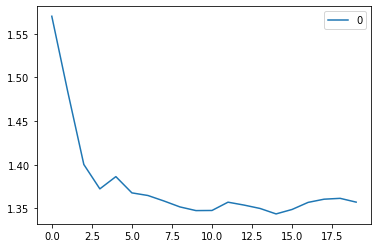

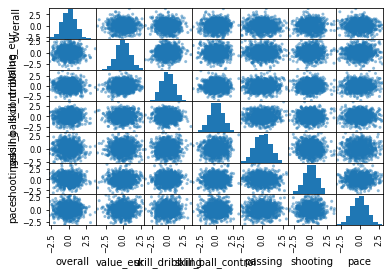

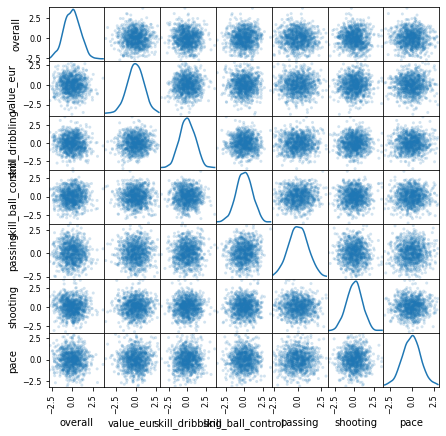

In [2]:
# KNNReg.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import asarray
from numpy import savetxt

# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum())

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# we skip the scaling for now since the dataset looks fine and well scaled
# moving on to the different K-values evaluation

# array to store r mean square error values for different values of k
rmse_val = []

for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train) # model fitting
    pred = model.predict(x_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

#plotting the rmse values against k values
# the resulting double elbow curve reveals 3 and 9
# as the most consisitent K-values
curve = pd.DataFrame(rmse_val) 
curve.plot()

# sample prediction and evaluation
k = 9
model = neighbors.KNeighborsRegressor(n_neighbors = k)
model.fit(x_train, y_train) # model fitting
pred = model.predict(x_test) # prediction
evaluation = model.score(x_test, y_test) # evaluation or score
print("predictions: \n",pred, "\n")
print(y_test, "\n")
print("score: ", evaluation, "\n")

# sample visualization
from pandas.plotting import scatter_matrix
newdf = pd.DataFrame(np.random.randn(1000, 7), 
                     columns=['overall', 'value_eur', 'skill_dribbling', 'skill_ball_control', 'passing', 'shooting', 'pace'])
pd.plotting.scatter_matrix(newdf)
plt.show()

scatter_matrix(newdf, alpha=0.2, figsize=(7,7), diagonal='kde')
#######################################################################
# time for real deal prediction
test.to_csv('Datasets/test.csv')
y_test.to_csv('Datasets/y_test.csv')

predictions = pd.DataFrame(pred, columns = ['overall_pred'])
predictions.to_csv('Datasets/pred.csv', index = False)

# with basic printing done, we do this properly and output it to a file
new_test = pd.read_csv('Datasets/test.csv')
submission = pd.read_csv('Datasets/SampleSubmission.csv')
submission['sofifa_id'] = new_test['sofifa_id']
submission['age'] = new_test['age']
submission['actual_overall'] = new_test['overall']

# preprocess the test csv file
new_test.drop(['sofifa_id', 'age'], axis = 1, inplace = True)
# new_test['overall'].fillna(mean, inplace = True)
# new_test = pd.get_dummies(new_test)

# predicting on the test set and creating submission file
predict = model.predict(new_test)
submission['overall'] = predict
submission.to_csv('Datasets/submit_file.csv', index = False)



### KNN Regression with testing vs. training accuracy and multiple k-value evaluation

Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64
RMSE value for k=  1 is: 1.5700318468107581
RMSE value for k=  2 is: 1.4718186029535025
RMSE value for k=  3 is: 1.4306175822583291
RMSE value for k=  4 is: 1.4004463574160917
RMSE value for k=  5 is: 1.398427688513067
RMSE value for k=  6 is: 1.3884943884174201
RMSE value for k=  7 is: 1.3890240297064842
RMSE value for k=  8 is: 1.3700764121026243
RMSE value for k=  9 is: 1.3700950674413659
RMSE value for k=  10 is: 1.3699999999999994
RMSE value for k=  11 is: 1.3755840232274716
RMSE value for k=  12 is: 1.3712828543618074
RMSE value for k=  13 is: 1.3695872483230962
RMSE value for k=  14 is: 1.3795240971776737
RMSE value for k=  15 is: 1.3788320

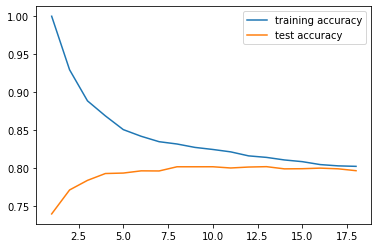

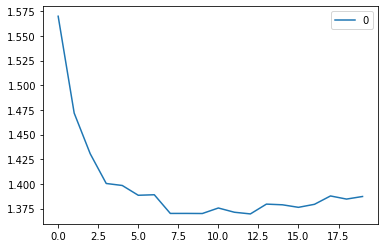

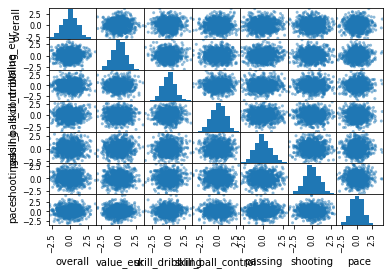

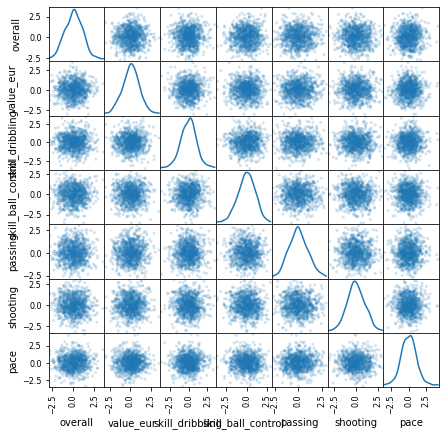

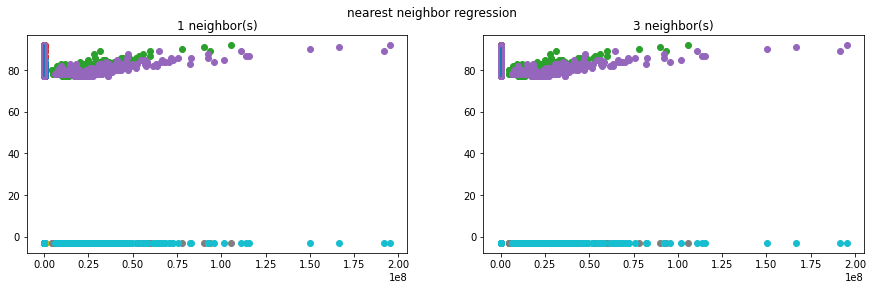

In [27]:
# KNNRegEval.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import asarray
from numpy import savetxt

# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum())

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# evaluation 2: testing vs. training accuracy with k-neighbors count

# training and test set comparison
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 19)

for n_neighbors in neighbors_settings:
    # retrain/build the model
    clf = neighbors.KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # records generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
#plt.show()
plt.legend()


# we skip the scaling for now since the dataset looks fine and well scaled
# moving on to the different K-values evaluation

# array to store r mean square error values for different values of k
rmse_val = []

for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train) # model fitting
    pred = model.predict(x_test) # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

#plotting the rmse values against k values
# the resulting double elbow curve reveals 3 and 9
# as the most consisitent K-values
curve = pd.DataFrame(rmse_val) 
curve.plot()

# sample prediction and evaluation
k = 3
model = neighbors.KNeighborsRegressor(n_neighbors = k)
model.fit(x_train, y_train) # model fitting
pred = model.predict(x_test) # prediction
evaluation = model.score(x_test, y_test) # evaluation or score
print("predictions: \n",pred, "\n")
print(y_test, "\n")
print("score: ", evaluation, "\n")

# sample visualization
from pandas.plotting import scatter_matrix
newdf = pd.DataFrame(np.random.randn(1000, 7), 
                     columns=['overall', 'value_eur', 'skill_dribbling', 'skill_ball_control', 'passing', 'shooting', 'pace'])
pd.plotting.scatter_matrix(newdf)
plt.show()

scatter_matrix(newdf, alpha=0.2, figsize=(7,7), diagonal='kde')
#######################################################################
# time for real deal prediction
test.to_csv('Datasets/test.csv')
y_test.to_csv('Datasets/y_test.csv')

predictions = pd.DataFrame(pred, columns = ['overall_pred'])
predictions.to_csv('Datasets/pred.csv', index = False)

# with basic printing done, we do this properly and output it to a file
new_test = pd.read_csv('Datasets/test.csv')
submission = pd.read_csv('Datasets/SampleSubmission.csv')
submission['sofifa_id'] = new_test['sofifa_id']
submission['age'] = new_test['age']
submission['actual_overall'] = new_test['overall']

# preprocess the test csv file
new_test.drop(['sofifa_id', 'age'], axis = 1, inplace = True)
# new_test['overall'].fillna(mean, inplace = True)
# new_test = pd.get_dummies(new_test)

# predicting on the test set and creating submission file
predict = model.predict(new_test)
submission['overall'] = predict
submission.to_csv('Datasets/submit_file.csv', index = False)

# evaluation 1: multiple KNN Regression predictions with various k values

fig, axes = plt.subplots(1, 2, figsize = (15, 4))
plt.suptitle("nearest neighbor regression")

# plot the comparison graph for the specified KNeighbors
line = np.linspace(-3, 3, 200).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 5, 7, 9, 11, 13, 15, 17], axes):
    reg = neighbors.KNeighborsRegressor(n_neighbors = n_neighbors).fit(x_test, y_test)
    ax.plot(x_test,y_test, 'o')
    ax.plot(x_test, -3 * np.ones(len(x_test)), 'o')
    ax.plot(line, reg.predict(x_test))
    ax.set_title("%d neighbor(s)" % n_neighbors)




<hr>

### Multiple Linear Regression (MLR)

This is a visual representation of the MLR implementation, which the subsequent code performs:
<hr>
<img src="outputs/models/mlrapplication.png" alt="Multiple Linear Regression Application">

Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64
predicted values:

 [86.8747943  79.98287891 79.26993736 79.18332689 79.67756544 80.60501831
 80.52276787 79.29888782 80.28082223 78.12278117 79.6012055  80.21880171
 79.34236509 80.01603953 81.55328082 80.1751625  78.29607511 79.04708373
 78.99171736 78.43517057 82.28184572 78.90349655 80.00990784 78.13109112
 78.40954873 77.88751127 79.03719414 78.30889441 80.79354622 80.75094826
 79.95673579 78.42026576 79.43704207 80.19447842 81.57691416 78.37510851
 80.03805467 81.60567414 78.34112407 80.06318956 79.0295774  77.52133698
 79.10315286 78.45721869 76.70407925 79.20363191 79.0899063  81.02318519
 78.73865861 78.88245809 78.62692699 78.04434026 83

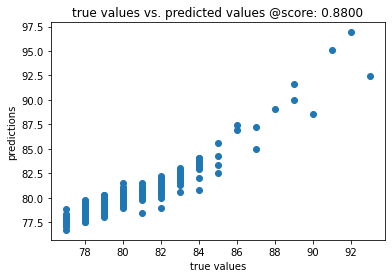

In [12]:
# MLReg.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from numpy import asarray
from numpy import savetxt


# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum())

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# we begin the multiple linear regression prediction
regressor = LinearRegression()
regressor.fit(x_train, y_train)
score = regressor.score(x_test, y_test)

# Predicting the Test set results
model = LinearRegression()
pred = regressor.predict(x_test)
print("predicted values:\n\n", pred, "\n\n\n")

###################################

# compare predictions with actual values
plt.scatter(y_test, pred)
plt.xlabel('true values')
plt.ylabel('predictions')
plt.title('true values vs. predicted values @score: {0:.4f}'.format(score))
plt.show()

# no writing to csv required in this case

### Multiple Linear Regression with Ridge Regression and Cross-Validation Evaluation

Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64


c:\users\windows acn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\users\windows acn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
c:\users\windows acn\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


predicted values:

 [79.40361188 83.55486616 81.26935389 80.42627552 78.96459486 77.67666383
 78.73827333 79.41593791 77.77116033 78.16103164 97.4660832  77.23137748
 86.81600328 76.81955798 80.05663759 78.96210958 80.27110505 81.04851716
 78.68319823 78.45633012 81.80349478 81.4980994  79.13071163 79.89028273
 77.32858504 80.00879513 82.87576176 80.12204373 77.2806339  79.79710615
 81.62573841 78.56275373 78.32515851 83.12310018 79.84451354 78.1694399
 79.21211357 78.36624133 83.71347022 80.08086447 84.79650572 81.79482146
 77.37925677 79.60018492 80.15336693 78.48446607 79.1487607  78.38785964
 79.98373812 78.34131857 80.94055847 85.41116137 79.8378149  80.91723177
 79.93314862 78.06396441 90.66206746 78.37770273 82.33729768 79.17513625
 77.35149402 79.15112245 78.84941524 78.6350503  78.02655455 79.88049548
 82.26505602 78.3163484  79.48591601 81.6581002  80.13699552 82.86257194
 80.40764975 80.03022497 78.87806953 79.99323897 81.18445367 83.14113558
 78.17952985 79.72807329 79.1203

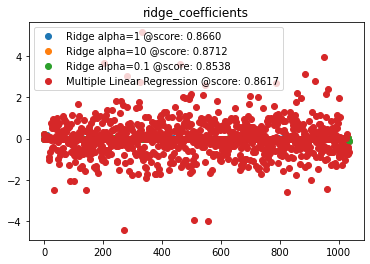

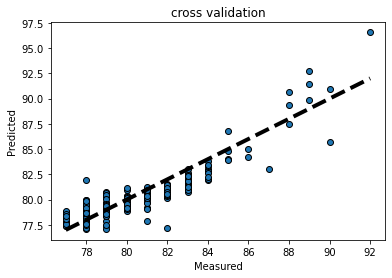

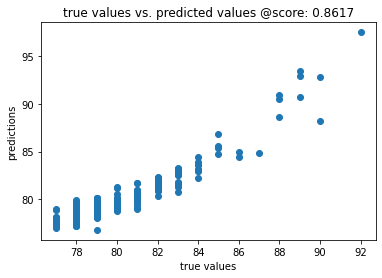

In [13]:
# MLRegEval.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from numpy import asarray
from numpy import savetxt
from sklearn.linear_model import Ridge


# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum())

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

#-------------------------------------------------------

# formal evaluation 1: RidgeRegression

# default with alpha/shrinkage at 1.0
ridge = Ridge().fit(x_train, y_train)
ridge_def_score = ridge.score(x_test, y_test)

# with alpha/shrinkage parameter set to 10.0
ridge10 = Ridge(alpha = 10).fit(x_train, y_train)
ridge10_score = ridge10.score(x_test, y_test)

# with alpha at 0.1
ridge01 = Ridge(alpha = 0.1).fit(x_train, y_train)
ridge01_score = ridge01.score(x_test, y_test)

# plain Multiple Linear Regression
lr = LinearRegression().fit(x_train,y_train)
lr_score = lr.score(x_test, y_test)

# visualize the differences
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1 @score: {0:.4f}".format(ridge_def_score)) 
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10 @score: {0:.4f}".format(ridge10_score)) 
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1 @score: {0:.4f}".format(ridge01_score))
plt.plot(lr.coef_, 'o', label="Multiple Linear Regression @score: {0:.4f}".format(lr_score)) 
#plt.ylim(-25, 25)
plt.legend()

# -------------------------------------------------------

# we begin the multiple linear regression prediction
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
model = LinearRegression()
pred = regressor.predict(x_test)
print("predicted values:\n\n", pred, "\n\n\n")

#######################################################################################
# cross -validation evaluation

# print the score
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("score: ", score, "\n")

# applying cross validation measurement at an interval of 10
pred2 = cross_val_predict(model, x_test, y_test, cv=10)
print("cross validation measured values\n", pred2, "\n")

# now show the validated values at every 10th interval
cross_val_scores = cross_val_score(model, x_test, y_test, cv=10)
print ("cross validation scores at every 10th interval:\n", cross_val_scores, "\n")

# rounding it up with visualzation
fig, ax = plt.subplots()
ax.scatter(y_test, pred2, edgecolors=(0,0,0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('cross validation')
plt.show()

# compare predictions with actual values
plt.scatter(y_test, pred)
plt.xlabel('true values')
plt.ylabel('predictions')
plt.title('true values vs. predicted values @score: {0:.4f}'.format(score))
plt.show()

# no writing to csv required in this case

<hr>

### Voting Regression Algorithm

This is a visual representation of the Voting Regression implementation, which the subsequent code performs:
<hr>
<img src="outputs/models/vregapplication.png" alt="Voting Regression Application">

Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64 


RandomForestRegressor Predictions:
 [77.1 78.4 79.6 83.4 83.2 78.1 84.5 78.2 77.6 77.1 78.1 78.  79.1 78.
 80.7 79.9 77.8 80.2 83.6 80.6 78.1 78.2 79.6 79.6 82.5 88.6 77.2 79.3
 78.1 81.8 79.3 88.8 86.1 79.  81.2 78.2 89.3 78.  83.8 79.6 79.9 78.2
 78.  78.1 79.4 82.3 77.1 89.3 80.  79.2 77.  83.  77.2 77.2 79.2 79.8
 82.2 78.9 82.5 83.7 81.6 79.3 78.1 78.1 78.  80.1 79.7 77.1 79.7 82.9
 78.4 83.7 77.3 78.4 79.4 77.7 77.  77.2 80.  81.4 78.7 80.6 79.3 79.3
 79.  80.  84.1 79.8 79.5 85.2 78.  79.6 84.7 81.1 86.1 82.4 78.7 78.
 79.2 79.5 79.9 81.3 82.5 78.5 78.1 77.1 79.1 82.1 78.6 79.4 78.4 78.9
 81.6 86.3 80.5 83.6 82.  87.4 78.5 77.8 81.6 77.1

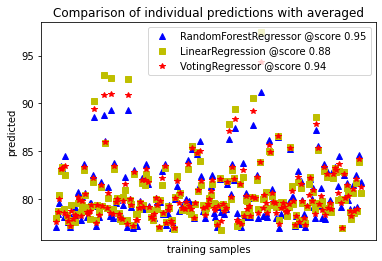

In [14]:
# VotingReg.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from numpy import asarray
from numpy import savetxt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum(), "\n\n")

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# we begin the voting regression algorithm using RandomForest and LinearRegression
reg1 = RandomForestRegressor(random_state = 0, n_estimators = 10)
reg2 = LinearRegression()
vreg = VotingRegressor([ ('rf', reg1), ('lr', reg2) ])

# fit the additive models
reg1.fit(x_train, y_train)
reg2.fit(x_train, y_train)
vreg.fit(x_train, y_train)

# score and check the accuracy
rfscore = reg1.score(x_test, y_test)
lrscore = reg2.score(x_test, y_test)
vrscore = vreg.score(x_test, y_test)

# make predictions and print intermediate results
print("RandomForestRegressor Predictions:\n", reg1.predict(x_test), "\n")
print("Linear Regression Predictions:\n", reg2.predict(x_test), "\n")
print("Voting Regressor Predictions:\n", vreg.predict(x_test), "\n")

# visualization and comparison
plt.figure()
plt.plot(reg1.predict(x_test), 'b^', label = 'RandomForestRegressor @score {0:.2f}'.format(rfscore))
plt.plot(reg2.predict(x_test), 'ys', label = 'LinearRegression @score {0:.2f}'.format(lrscore))
plt.plot(vreg.predict(x_test), 'r*', label = 'VotingRegressor @score {0:.2f}'.format(vrscore))
# plt.tick_params(axis = 'x', which = 'both', top = False, labelbottom = True)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

# recommended writing to csv since there're multiple additive predictors
actual_col = np.array(y_test)
rf_col = np.array(reg1.predict(x_test))
lr_col = np.array(reg2.predict(x_test))
vr_col = np.array(vreg.predict(x_test))
save_df = pd.DataFrame(
{'actual_overall':actual_col, 'rforest_reg_predicted':rf_col, 'linear_reg_predicted':lr_col, 'voting_reg_predicted':vr_col})
save_df.to_csv("Datasets/VotingRegressorSubmission.csv", index = False)

<hr>

### Gradient Boosting Regression (GBR) Algorithm

This is a visual representation of the GBR implementation, which the subsequent code performs:
<hr>
<img src="outputs/models/gbrapplication.png" alt="Gradient Boosting Regression Application">

Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64 


MSE: 0.3163
size of prediction:  200
prediction: 
 [77.50066071 80.28166753 83.31445071 83.94106728 77.56628816 82.04748441
 80.90129235 82.15505717 80.05711914 82.20841276 78.53161703 79.26524484
 78.54827103 79.85468865 77.61092536 77.28587469 79.94905361 81.86297481
 78.77746635 79.86319322 78.43557098 79.3266269  86.13456282 78.31285015
 77.43495862 85.26201168 85.5060164  77.5130349  81.19944164 79.46969341
 80.6592216  83.39882666 77.84822156 82.10207437 85.87807291 82.25905858
 77.86798187 78.27475122 79.05309264 87.87071948 77.46228843 83.96412312
 77.24764857 83.94333067 82.1354546  87.65383486 79.04751774 79.86771727
 80.16661881 78.8

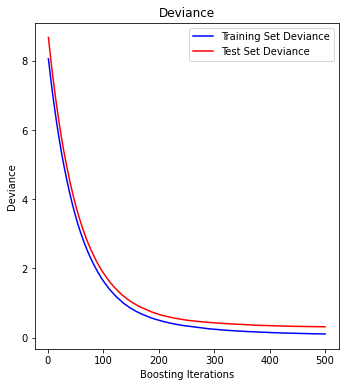

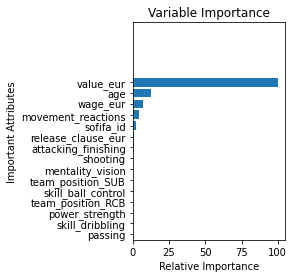

In [17]:
# GBR.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from numpy import asarray
from numpy import savetxt

from sklearn.utils import shuffle
from sklearn import ensemble

# skipping previously explained preprocessing steps

# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum(), "\n\n")

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# import statements and preprocessing steps are skipped due to similarity #######
# begin gradient boosting by fitting GBR model_selection 	#####################

# we declare parameters by specifying the number of estimators
#	minimum samples to use, and the inbuilt loss function
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# format everything in the params dictionary and swap their values into the model
clf = ensemble.GradientBoostingRegressor(**params)

# finally fit the model
clf.fit(x_train, y_train)

# get the score
score = clf.score(x_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, clf.predict(x_test))

# print our values (MSE, prediction size, score, and prediction itself)
print("MSE: %.4f" % mse)
print("size of prediction: ", len(clf.predict(x_test)))
print("prediction: \n", clf.predict(x_test))
print("test score: {0:.4f}\n".format(score))
# visualization time 	########################################################

# training deviance -> first compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

# plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_test.columns[sorted_idx])
plt.yticks(None)

# plt.setp(plt.subplot(1, 2, 2).get_yticklabels(), visible=False)
plt.ylabel('Important Attributes')
plt.ylim(1020, 1040) # limit the values to show since it's not much
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()


### Gradient Boosting with XGBoost evaluation

Prerequisites for this section: 

1. You most likely will encounter an error installing XGBoost via <code>pip</code>. You'll find instructions on the <a href="https://xgboost.readthedocs.io/en/latest/build.html">vendor's website</a>.


Automatically created module for IPython interactive environment
sofifa_id            0
age                  0
overall              0
value_eur            0
wage_eur             0
                    ..
team_position_RS     0
team_position_RW     0
team_position_RWB    0
team_position_ST     0
team_position_SUB    0
Length: 1036, dtype: int64 


MSE: 0.5716
size of prediction:  200
prediction: 
 [80.03222639 84.09668454 77.4990349  83.90897344 82.75383275 79.08834487
 84.58305946 89.5579993  77.86457629 78.67911865 80.87253465 78.36024874
 82.18699615 79.62991533 78.29861031 84.85317724 78.42132316 78.72223459
 82.310451   78.28817555 79.11350053 78.9786203  82.12323901 84.47856302
 78.30486517 79.39080017 78.52160768 82.16451208 77.64708466 84.03558402
 79.17416666 80.12226739 81.79389443 85.51204361 78.07534453 84.28879268
 81.95918051 79.13588716 80.99331227 78.73419168 77.13144436 79.46984439
 79.00573627 82.13973596 79.66391275 77.34965516 88.01157852 77.74126079
 77.45649445 89.2

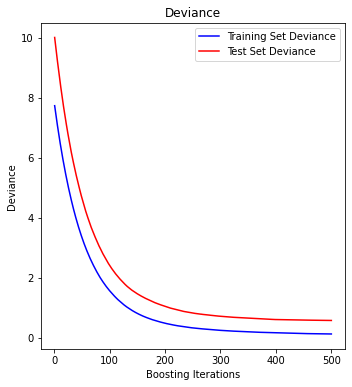

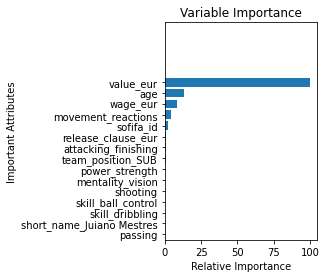

XGB predictions:
 [79.83954  84.4557   77.47257  84.12741  83.20348  79.71965  84.507614
 89.625    78.0602   78.661    80.64833  78.12047  82.4132   79.83159
 78.38893  85.62745  78.54127  78.999245 82.55367  78.563034 79.382576
 79.468605 83.43974  84.006615 77.85358  79.73917  78.19146  82.58214
 77.62072  84.11112  79.54766  80.08623  81.31419  85.5844   78.25554
 84.378136 81.88007  78.74612  80.12361  78.14174  76.9646   79.90122
 78.03387  82.06241  80.692795 77.23939  88.83091  77.466995 77.07657
 89.121635 81.034294 77.63385  79.61537  76.92048  79.50215  80.21723
 79.386856 82.24164  81.00054  78.81714  76.97433  77.35805  77.87139
 84.98284  79.02129  86.419304 77.24919  82.99761  78.72895  79.58036
 78.10361  81.53009  77.98868  78.335884 79.988335 83.097336 83.42798
 77.75666  77.01154  81.84401  85.19378  78.474    83.81032  78.052536
 81.28176  79.183525 78.722916 79.9721   79.40503  77.88457  86.89866
 80.04575  83.17865  77.27263  78.17345  79.19656  78.13317  81.01819

In [18]:
# GBR_XGBoost.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict
from numpy import asarray
from numpy import savetxt
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import ensemble

# skipping previously explained preprocessing steps

# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# missing values in the Outfield Players dataset needs to be imputed
# this little checkup (previous code block) reveals the followng missing values:
# release_clause_eur     55
# team_position          21  -> not too relevant. to be dropped later on
# dribbling              25
# passing                25
# shooting               25
# pace                   25

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# note that the team_position is not really too important, 
# so it can be momentarily dropped or else we convert to numeric values
#df.drop(['team_position'], axis=1, inplace=True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

print(df.isnull().sum(), "\n\n")

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# import statements and preprocessing steps are skipped due to similarity #######
# begin gradient boosting by fitting GBR model_selection 	#####################

# we declare parameters by specifying the number of estimators
#	minimum samples to use, and the inbuilt loss function
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# format everything in the params dictionary and swap their values into the model
clf = ensemble.GradientBoostingRegressor(**params)

# finally fit the model
clf.fit(x_train, y_train)

# get the score
score = clf.score(x_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, clf.predict(x_test))

# print our values (MSE, prediction size, score, and prediction itself)
print("MSE: %.4f" % mse)
print("size of prediction: ", len(clf.predict(x_test)))
print("prediction: \n", clf.predict(x_test))
print("test score: {0:.4f}\n".format(score))
# visualization time 	########################################################

# training deviance -> first compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

# plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_test.columns[sorted_idx])
plt.yticks(None)

# plt.setp(plt.subplot(1, 2, 2).get_yticklabels(), visible=False)
plt.ylabel('Important Attributes')
plt.ylim(1020, 1040) # limit the values to show since it's not much
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()

# XGBoost evaluation

xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

# XGB prediction and accuracy
xgb_pred = xgb_model.predict(x_test)
xgb_predictions = [round(value) for value in xgb_pred]
accuracy = accuracy_score(y_test, xgb_predictions)

print("XGB predictions:\n", xgb_pred, "\n")
print("Accuracy: %.2f%%" % (accuracy * 100.0))


## Model Comparison


Automatically created module for IPython interactive environment
KNNReg| Mean = 0.630142 STD = 0.179611 Variance = 0.032260
MLR| Mean = 0.812274 STD = 0.068709 Variance = 0.004721
VReg| Mean = 0.857354 STD = 0.060742 Variance = 0.003690
GBR| Mean = 0.854664 STD = 0.074611 Variance = 0.005567


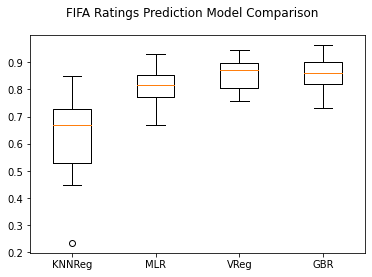

In [20]:
# ModelComparison.py

print(__doc__)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

# the models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor #needed for Voting Regressor

# read the file
df = pd.read_csv("Datasets/Outfield_Players_features.csv")
df.head

# impute the missing values
df.isnull().sum()

# imputing release_clause_eur with mean value
mean = df['release_clause_eur'].mean()
df['release_clause_eur'].fillna(mean, inplace = True)

# imputing dribbling with mean value
mean = df['dribbling'].mean()
df['dribbling'].fillna(mean, inplace = True)

# imputing passing with mean value
mean = df['passing'].mean()
df['passing'].fillna(mean, inplace = True)

# now for shooting
mean = df['shooting'].mean()
df['shooting'].fillna(mean, inplace = True)

# same is done for pace
mean = df['pace'].mean()
df['pace'].fillna(mean, inplace = True)

# convert categorical data into numerical data if need be
df = pd.get_dummies(df)

# split data into training (80%) and test set (20%)
train, test = train_test_split(df, test_size = 0.2)
# print(test[0:1])

# save the cleaned data tocsv for future use
df.to_csv("Datasets/cleaned_dataset.csv")

# identify the data to be trained followed by labels and target (overall)
x_train = train.drop('overall', axis = 1)
y_train = train['overall']

x_test = test.drop('overall', axis = 1)
y_test = test['overall']

# prepare voting regressor weak builders
reg1 = RandomForestRegressor(random_state = 0, n_estimators = 10)
reg2 = LinearRegression()

# prepare gradient boosting regressor parameters
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# identifying random seed
random_seed = 12

# preparing the models to use
outcome = []          # results of cross validation
model_names = []      # the name tag of the models
models = []           # tuple mapping for DECLARING the models

# insert the models inside the respective array
models.append(('KNNReg', KNeighborsRegressor(n_neighbors = 9)))
models.append(('MLR', LinearRegression()))
models.append(('VReg', VotingRegressor([ ('rf', reg1), ('lr', reg2) ])))
models.append(('GBR', GradientBoostingRegressor(**params)))

# run the K-fold analysis through a for loop on all models
# and generate mean and standard deviation for all models
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits = 10, random_state = random_seed, shuffle = True)
    results = model_selection.cross_val_score(model, x_test, y_test, cv = k_fold_validation, scoring = 'r2')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean = %f STD = %f Variance = %f" % (model_name, results.mean(), results.std(), results.var())
    print(output_message)
    
# finally, visualize the analysis
fig = plt.figure()
fig.suptitle('FIFA Ratings Prediction Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()


## Conclusion

In this report, four simple regression-based algorithms and models were used to predict the overall player ratings from FIFA 20, of 200 outfield players based on a training data set consisting of 1000 players from which we removed the 200. The initial datasets had thousands of players and features but underwent pre-processing and cleaning.

The KNN regression model came out with an 81.66% accuracy; MLR, 88.93%; voting regressor, 95%; GBR, 95.94%. 

<b>The variable importance graph from the GBR algorithm shows that monetary features like wage, value, and players’ age, contribute the most to overall player ratings.</b>